# SML 310 - Project 3 - NLP and Neural Networks
Pranav Avva

In [26]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
sns.set()

## Problem 1 - NLP and Word2Vec

### Part A

**Please describe what is meant by a "vector embedding" of words in Word2Vec.**

### Part B

**Please use the pre-trained gensim `glove-wiki-gigaword-50` Word2Vec model to determine reasonable synonyms for the following words:**
1. **Tiger**
2. **Awesome**
3. **Song**
4. **Data**

### Part C

**Please use the pre-trained gensim `glove-wiki-gigaword-50` Word2Vec models to determine reasonable answers for the following analogies:**

1. **puppy : kitten :: dog : ?**
2. **freshman : sophomore :: junior : ?**
3. **brother : sister :: grandson : ?**

## Problem 2 - NLP and Topic Modeling

### Part A

**Please prepare the built-in “fake-news” corpus of text using the commands:**

```python
import gensim.downloader as api
corpus_data = api.load("fake-news")
docs = [x['text'] for x in corpus_data]
```

**From the Gensim GitHub at https://github.com/RaRe-Technologies/gensim-data.**

### Part B

**Please use Gensim to preprocess these documents by tokenizing and lemmatizing them and removing other small text/strings that you decide are not meaningful for NLP, as well as rare and scarce words.**

**You may find the following Gensim tutorial useful: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html**

### Part C

**Please use the Gensim `Dictionary` and `dictionary.doc2bow` to create a dictionary and a bag of words representation of your tokenized corpus.**

### Part D

**Please use the Gensim `LDAModel` to perform topic modelling of the corpus into 3 topics.**

### Part E

**For each topic show the main words and use these to give a rough name to each topic.**

## Problem 3 - Data Classification

### Part A

**Please take the MNIST training dataset and split off the last 10,000 images as a validation data set. Then assign the other training images to a new training set.**

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


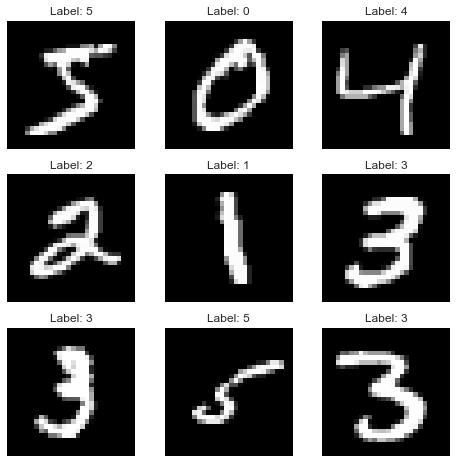

In [27]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# print the shape of all sets with the set name
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# show some training images with their labels
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X_train[i * 5 + j], cmap='binary_r')
        ax[i, j].set_title(f"Label: {y_train[i * 5 + j]}")
        ax[i, j].axis('off')

### Part B

**Please create a Neural Network with three dense hidden layers each having 32 nodes, and train it to classify the MNIST Data set over five epochs. For this please use your new training set and validation set respectively for model training and model performance reporting.**

In [53]:
model = keras.Sequential()

# create an input layer with 784 neurons
model.add(keras.layers.Flatten(input_shape=(28, 28), name='input'))

# create 3 hidden dense layers with 32 neurons each
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# create an output layer with 10 neurons
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 32)                25120     
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [55]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2171 - accuracy: 0.9408 - val_loss: 0.2234 - val_accuracy: 0.9391
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1942 - accuracy: 0.9455 - val_loss: 0.2169 - val_accuracy: 0.9405
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1771 - accuracy: 0.9503 - val_loss: 0.2039 - val_accuracy: 0.9473
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1637 - accuracy: 0.9544 - val_loss: 0.1829 - val_accuracy: 0.9509
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1559 - accuracy: 0.9560 - val_loss: 0.1848 - val_accuracy: 0.9539


### Part C

**What is the performance of the model on the training and validation sets over the 5 epochs? Which of these do we expect is characteristic of model performance in new data?**

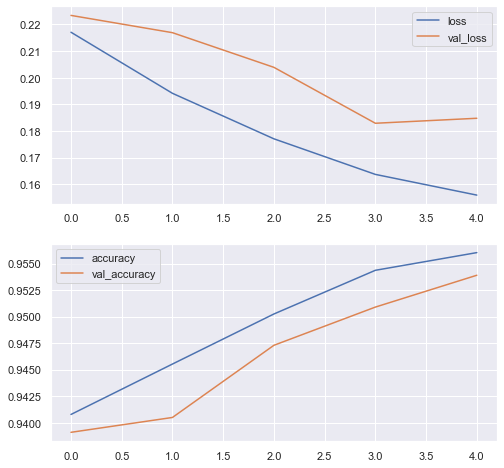

In [56]:
# plot loss, val_loss on one axis and accuracy, val_accuracy on the other
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()

### Part D

**Check your model performance on the test set, and compare with your expectations in Part C.**